<a href="https://colab.research.google.com/github/narutsoo/tutorial/blob/master/MC_Polynomial_Regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# 01 : Polynomial Regression 

---

* To import data .. Area (Sq.wa.) and Price x 1,000 (Baht) 


In [1]:
import numpy as np

X = np.array ([80, 104,  94,  72,  78, 130,  94, 114, 114, 104, 
               110, 86,  98, 110, 104, 106,  86, 116, 106, 128])

y = np.array ([7300, 9900, 9800, 4600, 7500, 10400, 9700, 9700, 10000, 10100, 
               9800, 8900, 9700, 9500, 9800, 9800, 8900, 9900, 9800, 10300])

In [2]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

* To import related libraries .. Matplotlib (For visualization)

In [3]:
import matplotlib.pyplot as plt

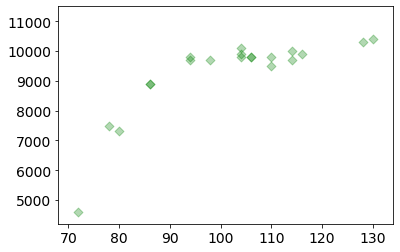

In [4]:
plt.scatter(X, y, s = 40, color='green', marker='D', alpha=.3, label = 'Data')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([68,134])
plt.ylim([4200,11500])
plt.show()

* To import Scikit-learn
* To use "polynomial features" and "linear model" from Scikit-learn

In [5]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

* To prepare Polynomial Features .. by defining Degree of Polynomial (order = 3, in this case)

In [6]:
poly_feature = PolynomialFeatures(degree=3) 


X_poly = poly_feature.fit_transform(X)

In [7]:
X_poly

array([[1.000000e+00, 8.000000e+01, 6.400000e+03, 5.120000e+05],
       [1.000000e+00, 1.040000e+02, 1.081600e+04, 1.124864e+06],
       [1.000000e+00, 9.400000e+01, 8.836000e+03, 8.305840e+05],
       [1.000000e+00, 7.200000e+01, 5.184000e+03, 3.732480e+05],
       [1.000000e+00, 7.800000e+01, 6.084000e+03, 4.745520e+05],
       [1.000000e+00, 1.300000e+02, 1.690000e+04, 2.197000e+06],
       [1.000000e+00, 9.400000e+01, 8.836000e+03, 8.305840e+05],
       [1.000000e+00, 1.140000e+02, 1.299600e+04, 1.481544e+06],
       [1.000000e+00, 1.140000e+02, 1.299600e+04, 1.481544e+06],
       [1.000000e+00, 1.040000e+02, 1.081600e+04, 1.124864e+06],
       [1.000000e+00, 1.100000e+02, 1.210000e+04, 1.331000e+06],
       [1.000000e+00, 8.600000e+01, 7.396000e+03, 6.360560e+05],
       [1.000000e+00, 9.800000e+01, 9.604000e+03, 9.411920e+05],
       [1.000000e+00, 1.100000e+02, 1.210000e+04, 1.331000e+06],
       [1.000000e+00, 1.040000e+02, 1.081600e+04, 1.124864e+06],
       [1.000000e+00, 1.0

In [8]:
poly_model = LinearRegression()

* To fit (train) the model by using x_poly, y

In [9]:
poly_model = poly_model.fit(X_poly, y)

* At this step, the Polynomial Model is obtained (presented by the red line)

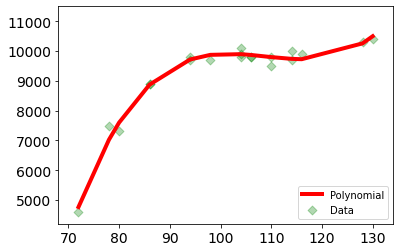

In [10]:
y_pred_poly = poly_model.predict(X_poly)

* To visualize the Linear Regression Model (red line) comparing with data (green)

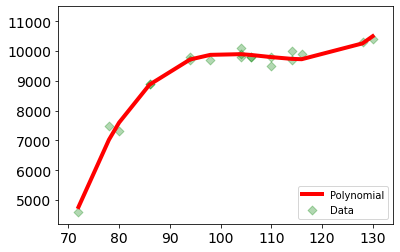

In [11]:
# Plot ข้อมูล (x,y) 
plt.scatter(X, y, s = 40, color='green', marker='D', alpha=.3, label = 'Data')

# เตรียมข้อมูล และ Plot Polynomial Regression Model (x,y_pred_poly) 
sorted_zip = sorted(zip(X, y_pred_poly))
X_plot, y_pred_plot = zip(*sorted_zip)

plt.plot(X_plot, y_pred_plot, linewidth=4, color='r', label='Polynomial')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([68,134])
plt.ylim([4200,11500])

plt.legend(loc = 'lower right')
plt.show()

* To evaluate the model

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
print ('RMSE (Root Mean Squared Error) = ', rmse_poly)

r2_poly = r2_score(y, y_pred_poly)
print ('R2 = ', r2_poly)

RMSE (Root Mean Squared Error) =  179.3334563642536
R2 =  0.9818619995648583


---
### To make prediction .. if House's Area = 120 Sq.wa.
*   Using Polynomial Feature to transform .. poly_feature.fit_transform()
*   To predict by using poly_model.predict()

In [13]:
x_poly_pred = poly_feature.fit_transform([[120]])

In [14]:
poly_model.predict(x_poly_pred)

array([[9766.86169353]])